In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('creditcard - Copy.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

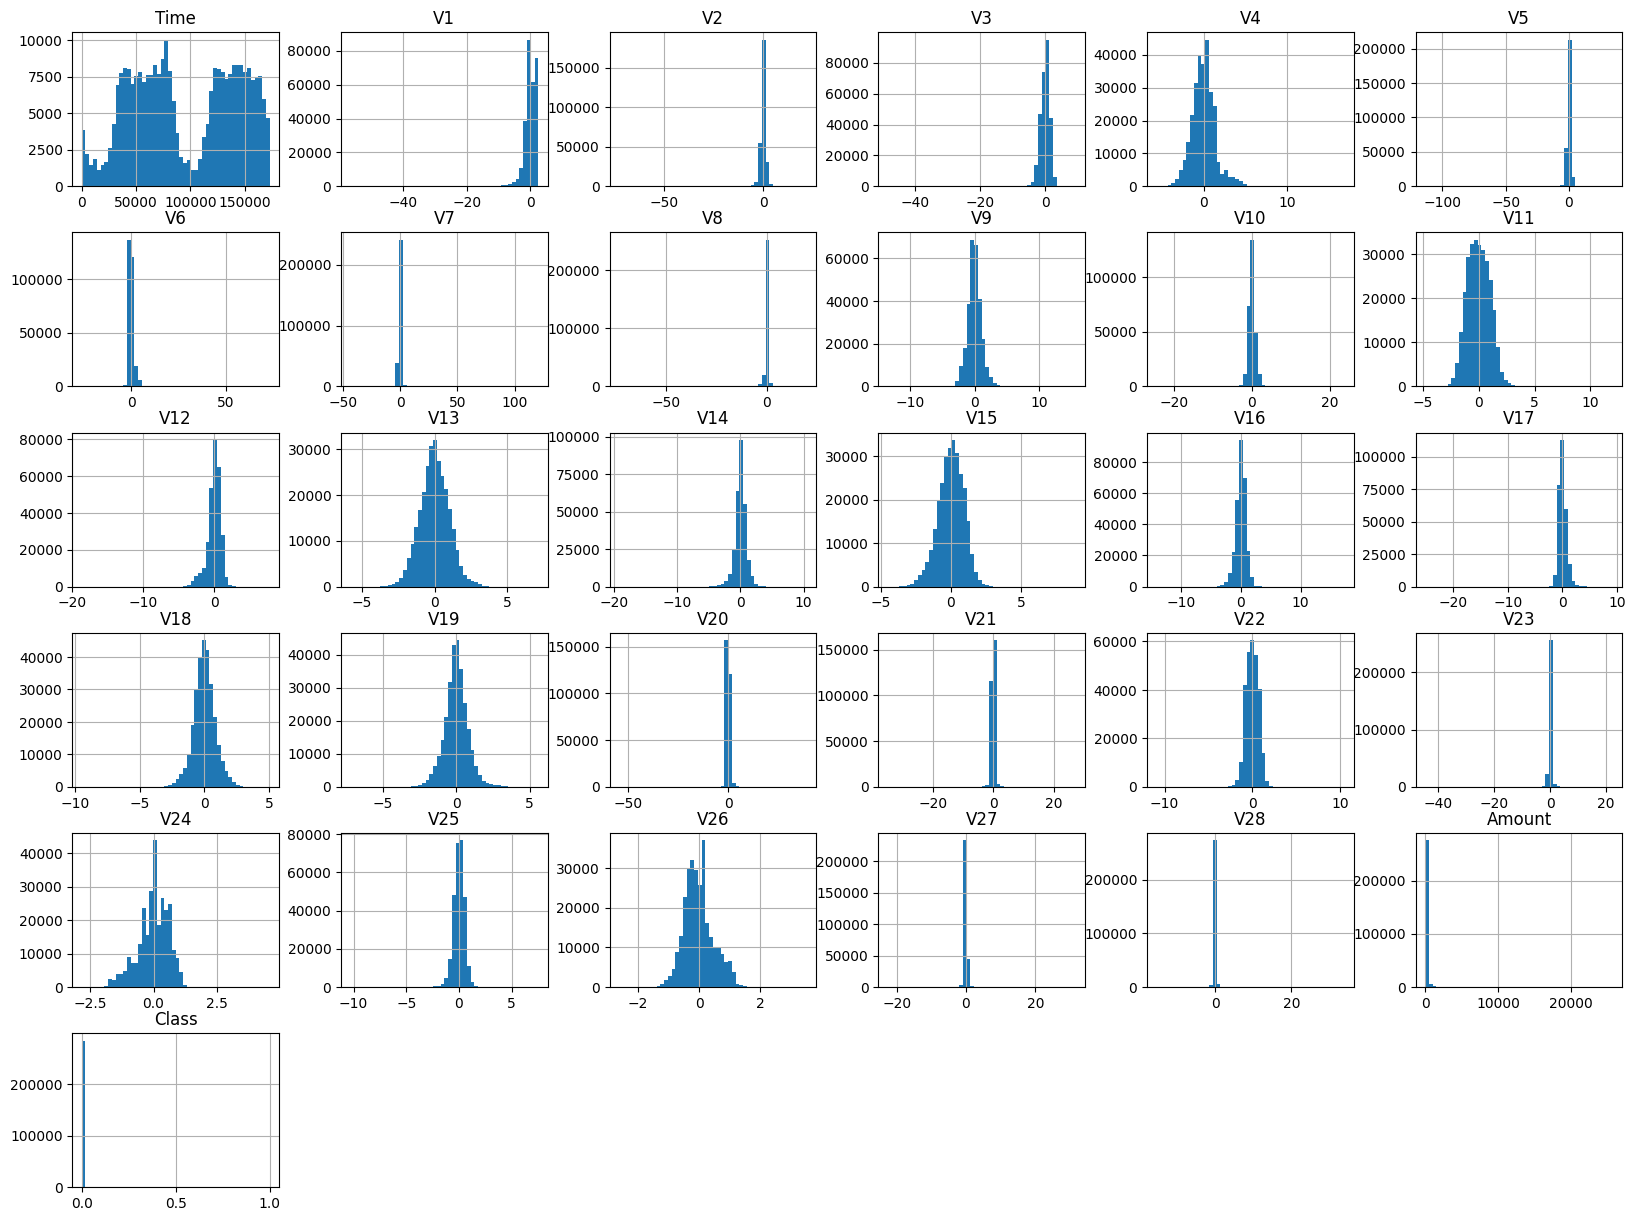

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].values.reshape(-1, 1))

In [15]:
new_df['Amount'].describe()

count    284807.000000
mean          0.927124
std           3.495006
min          -0.307413
25%          -0.229162
50%           0.000000
75%           0.770838
max         358.683155
Name: Amount, dtype: float64

In [19]:
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())

In [18]:
new_df = new_df.sample(frac=1, random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


In [20]:
train, test, val = new_df[:240000], new_df[240000:262000], new_df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

In [21]:
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()
train_np.shape, test_np.shape, val_np.shape

((240000, 31), (22000, 31), (22807, 31))

In [22]:
x_train, y_train = train_np[:, :-1], train_np[:, -1]
x_test, y_test = test_np[:, :-1], test_np[:, -1]
x_val, y_val = val_np[:, :-1], val_np[:, -1]
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

In [23]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

0.9992375

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.83      0.56      0.67        36

    accuracy                           1.00     22807
   macro avg       0.92      0.78      0.83     22807
weighted avg       1.00      1.00      1.00     22807



In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.81      0.47      0.60        36

    accuracy                           1.00     22807
   macro avg       0.90      0.74      0.80     22807
weighted avg       1.00      1.00      1.00     22807



In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
print(classification_report(y_val, gbc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.67      0.67      0.67        36

    accuracy                           1.00     22807
   macro avg       0.83      0.83      0.83     22807
weighted avg       1.00      1.00      1.00     22807



In [27]:
from sklearn.svm import LinearSVC
svc = LinearSVC(class_weight='balanced')
svc.fit(x_train, y_train)
print(classification_report(y_val, svc.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     22771
       Fraud       0.07      0.97      0.14        36

    accuracy                           0.98     22807
   macro avg       0.54      0.98      0.56     22807
weighted avg       1.00      0.98      0.99     22807



In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model
shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, activation='relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, activation='sigmoid'))

# Specify a valid filepath ending with '.keras'
checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)

# Compile the model
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
shallow_nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │            62 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2)              │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [33]:
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=checkpoint)

Epoch 1/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9628 - loss: 0.1587 - val_accuracy: 0.9992 - val_loss: 0.0095
Epoch 2/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9992 - val_loss: 0.0091
Epoch 3/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9993 - val_loss: 0.0079
Epoch 4/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9991 - val_loss: 0.0099
Epoch 5/5
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9991 - val_loss: 0.0086


In [34]:
def neural_net_predictions(model, x):
  return (model.predict(x).flatten() > 0.5).astype(int)
neural_net_predictions(shallow_nn, x_val)

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [35]:
print(classification_report(y_val, neural_net_predictions(shallow_nn, x_val), target_names=['Not Fraud', 'Fraud']))

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.71      0.75      0.73        36

    accuracy                           1.00     22807
   macro avg       0.86      0.87      0.86     22807
weighted avg       1.00      1.00      1.00     22807



In [36]:
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

In [37]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [38]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18372,0.170309,-1.762593,0.256143,1.683125,-1.279233,-1.902762,1.004210,-1.009748,-2.432546,0.458860,...,2.493579,0.320829,-0.535481,0.499401,-0.915196,-0.423434,0.107049,0.175922,2.906449,0
96341,0.380388,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,...,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,1.062111,1
248296,0.890522,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,-0.307413,1
264328,0.933932,-0.011624,0.640413,0.868046,-0.505279,0.261938,0.223098,0.239049,0.150877,0.225142,...,0.069401,0.268024,0.261459,0.683742,-1.567901,-0.816674,0.185781,0.283021,-0.272619,0
208904,0.794730,-0.679341,1.217389,-0.316778,-1.086725,0.855349,-0.980760,0.970589,0.133116,-0.357671,...,-0.083048,-0.137032,-0.238920,-0.617244,0.039020,-0.081848,0.234633,0.128382,-0.307273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81557,0.341393,-4.502731,-3.876484,1.341248,0.113400,0.189428,-0.560985,-0.140478,0.684651,0.475363,...,-0.140218,0.049411,2.313731,0.252330,0.307219,0.859051,0.184033,-0.308269,4.227625,0
276071,0.965803,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,-0.028645,1
175971,0.709373,1.972989,0.157281,-1.715078,1.207451,0.681612,-0.615282,0.601791,-0.291935,-0.132265,...,0.098640,0.467533,-0.078973,-0.371882,0.486038,-0.490665,-0.018374,-0.070911,0.075735,0
27738,0.200727,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1


In [42]:
balanced_df_np = balanced_df.to_numpy()

x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape

((700, 30), (700,), (142, 30), (142,))

In [43]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts(), pd.Series(y_val_b).value_counts()

(1    353
 0    347
 Name: count, dtype: int64,
 0    73
 1    69
 Name: count, dtype: int64,
 0    72
 1    70
 Name: count, dtype: int64)

In [44]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, logistic_model_b.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.93      0.94        72
       Fraud       0.93      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [45]:
rf_b = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, rf.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.70      1.00      0.82        72
       Fraud       1.00      0.56      0.72        70

    accuracy                           0.78       142
   macro avg       0.85      0.78      0.77       142
weighted avg       0.85      0.78      0.77       142



In [47]:
gbc_b = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=2, random_state=0)
gbc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, gbc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.81      1.00      0.89        72
       Fraud       1.00      0.76      0.86        70

    accuracy                           0.88       142
   macro avg       0.90      0.88      0.88       142
weighted avg       0.90      0.88      0.88       142



In [46]:
svc_b = LinearSVC(class_weight='balanced')
svc_b.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, svc.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.95      0.97      0.96        72
       Fraud       0.97      0.94      0.96        70

    accuracy                           0.96       142
   macro avg       0.96      0.96      0.96       142
weighted avg       0.96      0.96      0.96       142



In [49]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((x_train.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b.keras', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7893 - loss: 0.5015 - val_accuracy: 0.7324 - val_loss: 0.4764
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7990 - loss: 0.4853 - val_accuracy: 0.8310 - val_loss: 0.4218
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8031 - loss: 0.4740 - val_accuracy: 0.8873 - val_loss: 0.3976
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8352 - loss: 0.4475 - val_accuracy: 0.8944 - val_loss: 0.3834
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8511 - loss: 0.4177 - val_accuracy: 0.9085 - val_loss: 0.3708
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8507 - loss: 0.4194 - val_accuracy: 0.9225 - val_loss: 0.3627
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8374 - loss: 0.4021 - val_accuracy: 0.9225 - val_loss: 0.3550
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8565 - loss: 0.3963 - val_accuracy: 0.9296 - val_loss

In [50]:
shallow_nn_b.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9369 - loss: 0.2074 - val_accuracy: 0.9296 - val_loss: 0.2175
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9283 - loss: 0.2068 - val_accuracy: 0.9296 - val_loss: 0.2126
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9186 - loss: 0.2168 - val_accuracy: 0.9296 - val_loss: 0.2186
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9252 - loss: 0.2258 - val_accuracy: 0.9296 - val_loss: 0.2099
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9229 - loss: 0.2071 - val_accuracy: 0.9366 - val_loss: 0.2080
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9175 - loss: 0.2160 - val_accuracy: 0.9366 - val_loss: 0.2075
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9407 - loss: 0.1887 - val_accuracy: 0.9296 - val_loss: 0.2092
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9259 - loss: 0.2213 - val_accuracy: 0.9296 - val_loss:

In [51]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b, x_val_b), target_names=['Not Fraud', 'Fraud']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

   Not Fraud       0.94      0.93      0.94        72
       Fraud       0.93      0.94      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [53]:
shallow_nn_b1 = Sequential()
shallow_nn_b1.add(InputLayer((x_train.shape[1],)))
shallow_nn_b1.add(Dense(1, 'relu'))
shallow_nn_b1.add(BatchNormalization())
shallow_nn_b1.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn_b1.keras', save_best_only=True)
shallow_nn_b1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5034 - loss: 0.7375 - val_accuracy: 0.5704 - val_loss: 0.7032
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6121 - loss: 0.6696 - val_accuracy: 0.6761 - val_loss: 0.6141
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6859 - loss: 0.5891 - val_accuracy: 0.7183 - val_loss: 0.5687
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7239 - loss: 0.5554 - val_accuracy: 0.7746 - val_loss: 0.5373
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7567 - loss: 0.5299 - val_accuracy: 0.8169 - val_loss: 0.5146
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7644 - loss: 0.5294 - val_accuracy: 0.8310 - val_loss: 0.4965
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7594 - loss: 0.5163 - val_accuracy: 0.8592 - val_loss: 0.4823
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7848 - loss: 0.5125 - val_accuracy: 0.8592 - val_loss

In [54]:
shallow_nn_b1.fit(x_train_b, y_train_b, validation_data=(x_val_b, y_val_b), epochs=40, callbacks=checkpoint)

Epoch 1/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9054 - loss: 0.2765 - val_accuracy: 0.9296 - val_loss: 0.2347
Epoch 2/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9143 - loss: 0.2717 - val_accuracy: 0.9155 - val_loss: 0.2362
Epoch 3/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9248 - loss: 0.2447 - val_accuracy: 0.9155 - val_loss: 0.2313
Epoch 4/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9256 - loss: 0.2288 - val_accuracy: 0.9155 - val_loss: 0.2303
Epoch 5/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9245 - loss: 0.2485 - val_accuracy: 0.9225 - val_loss: 0.2296
Epoch 6/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9119 - loss: 0.2602 - val_accuracy: 0.9225 - val_loss: 0.2245
Epoch 7/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9023 - loss: 0.2462 - val_accuracy: 0.9225 - val_loss: 0.2235
Epoch 8/40
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9309 - loss: 0.2252 - val_accuracy: 0.9225 - val_loss:

In [55]:
print(classification_report(y_val_b, neural_net_predictions(shallow_nn_b1, x_val_b), target_names=['Not Fraud', 'Fraud']))

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/stepWARNING:tensorflow:5 out of the last 724 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002208D147F60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

   Not Fraud       0.91      0.94      0.93        72
       Fraud       0.94      0.90      0.92        70

    accuracy                    

In [56]:
print(classification_report(y_test_b, neural_net_predictions(shallow_nn_b, x_test_b), target_names=['Not Fraud', 'Fraud']))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

   Not Fraud       0.92      0.99      0.95        73
       Fraud       0.98      0.91      0.95        69

    accuracy                           0.95       142
   macro avg       0.95      0.95      0.95       142
weighted avg       0.95      0.95      0.95       142

